In [1]:
import pandas as pd
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

print(train_data.shape)
print(test_data.shape)

train_data.head()
# test_data.head()

print(test_data.index)


(1460, 81)
(1459, 80)
RangeIndex(start=0, stop=1459, step=1)


In [2]:

X = pd.concat([train_data.drop(columns=['SalePrice', 'Id'], axis=1), test_data.drop(columns=['Id'], axis=1)], axis=0, ignore_index=True)
y = train_data[['SalePrice']]
X.shape

(2919, 79)

In [3]:
X.info()
X.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

RangeIndex(start=0, stop=2919, step=1)

In [4]:
numeric_features = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
numeric_features.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [5]:
cat_train = X.select_dtypes(include=['object']).copy()
cat_train['MSSubClass'] = X['MSSubClass']
cat_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

In [6]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
from sklearn.impute import SimpleImputer


In [7]:
disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

cont_num_var = []
for i in numeric_features.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)

C:\Users\qing.tang\AppData\Local\Temp\ipykernel_15144\41530531.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_features.loc[:,col].dropna(), kde=False)


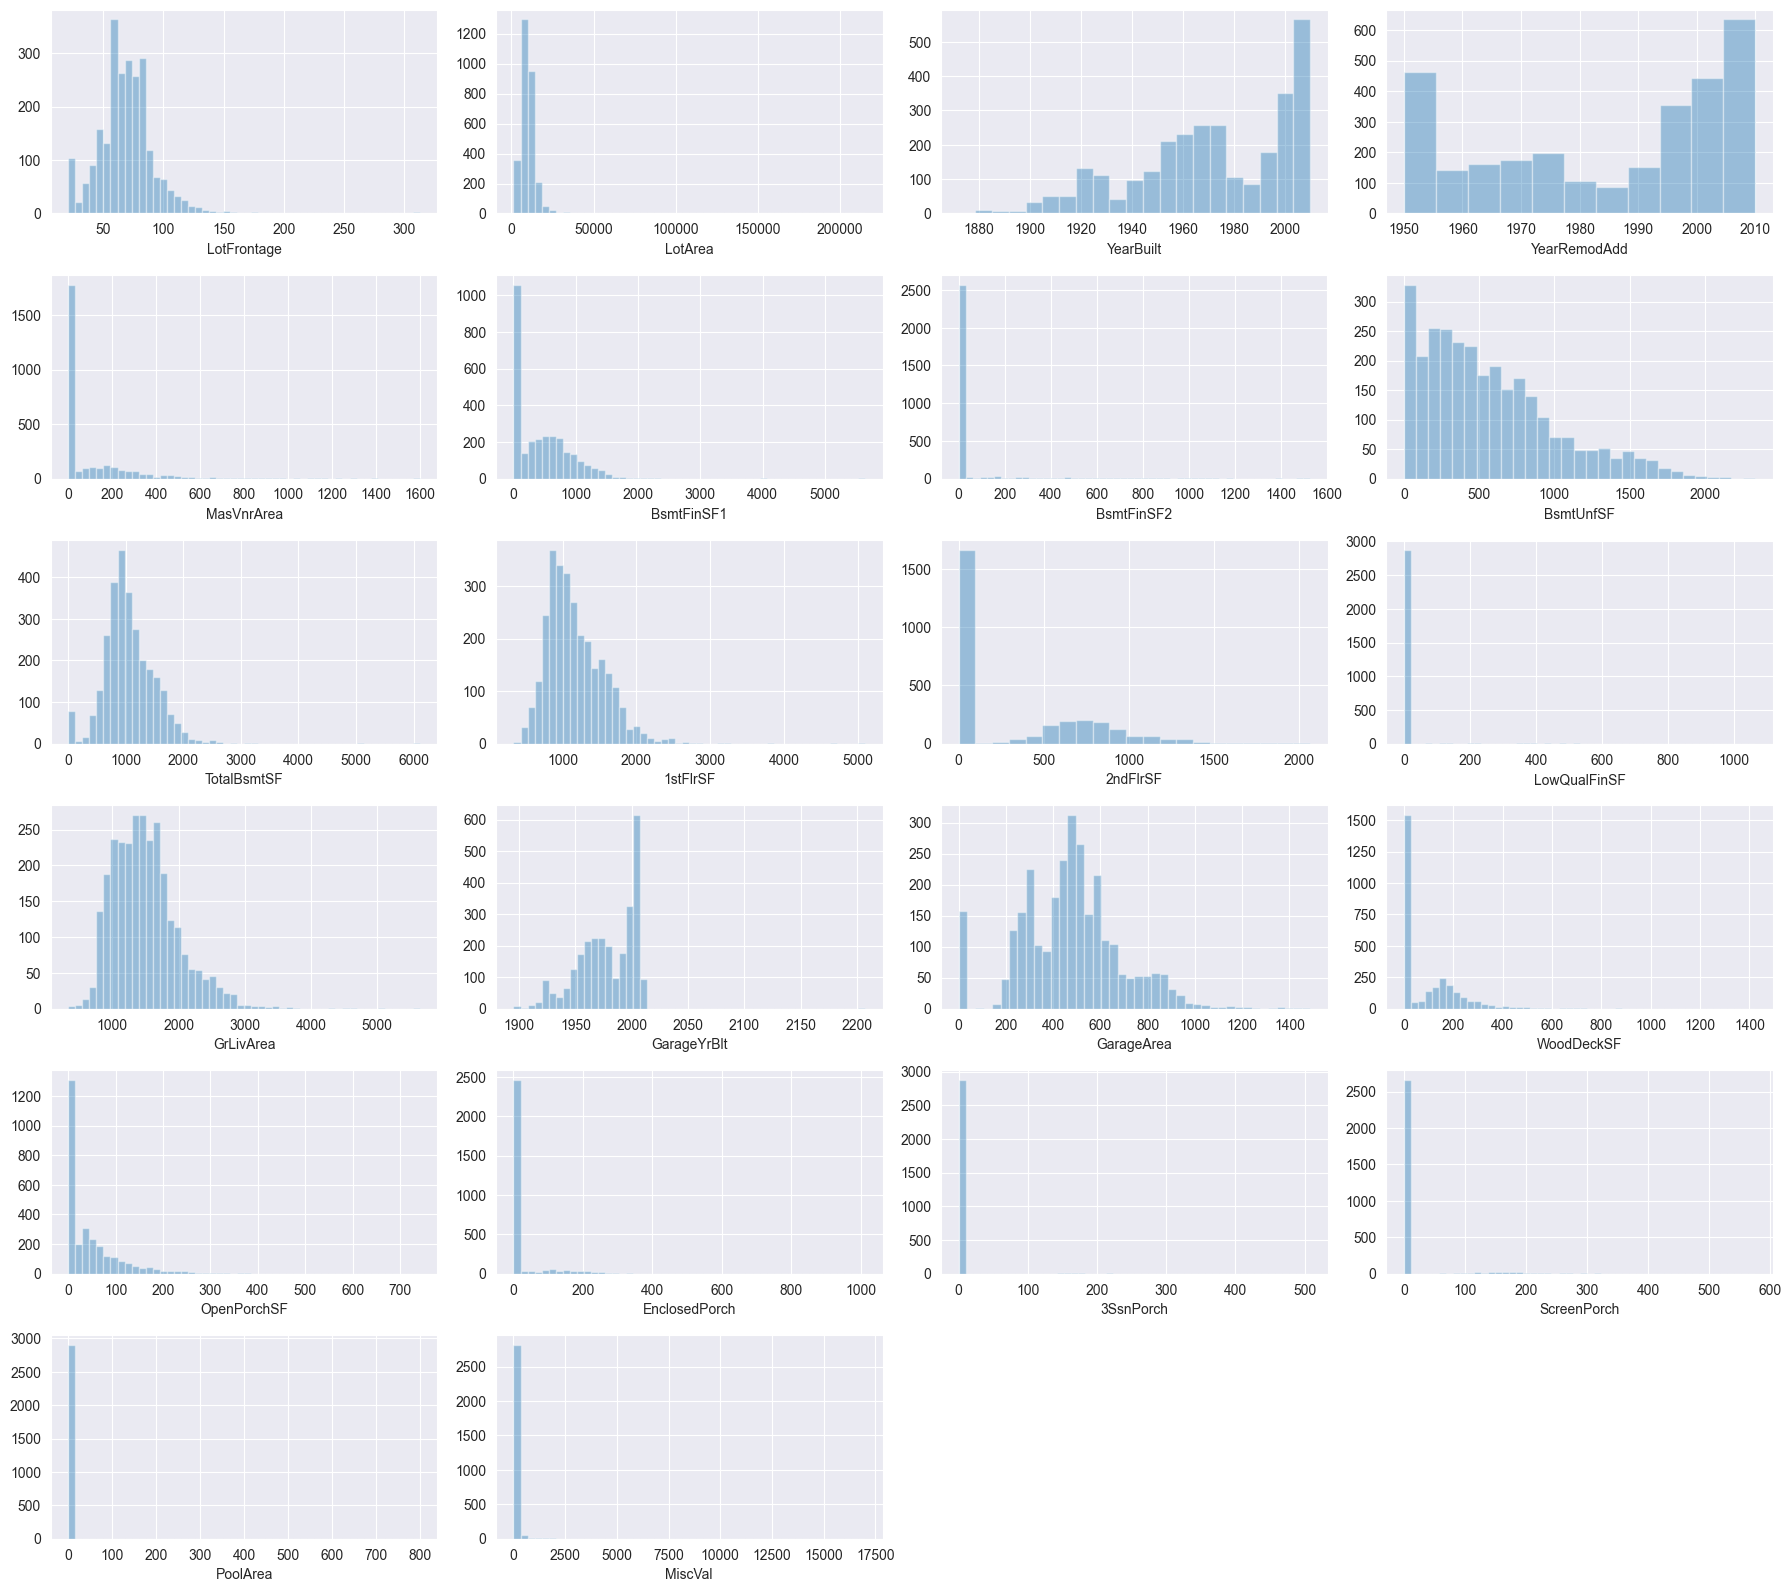

In [8]:

fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_features.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

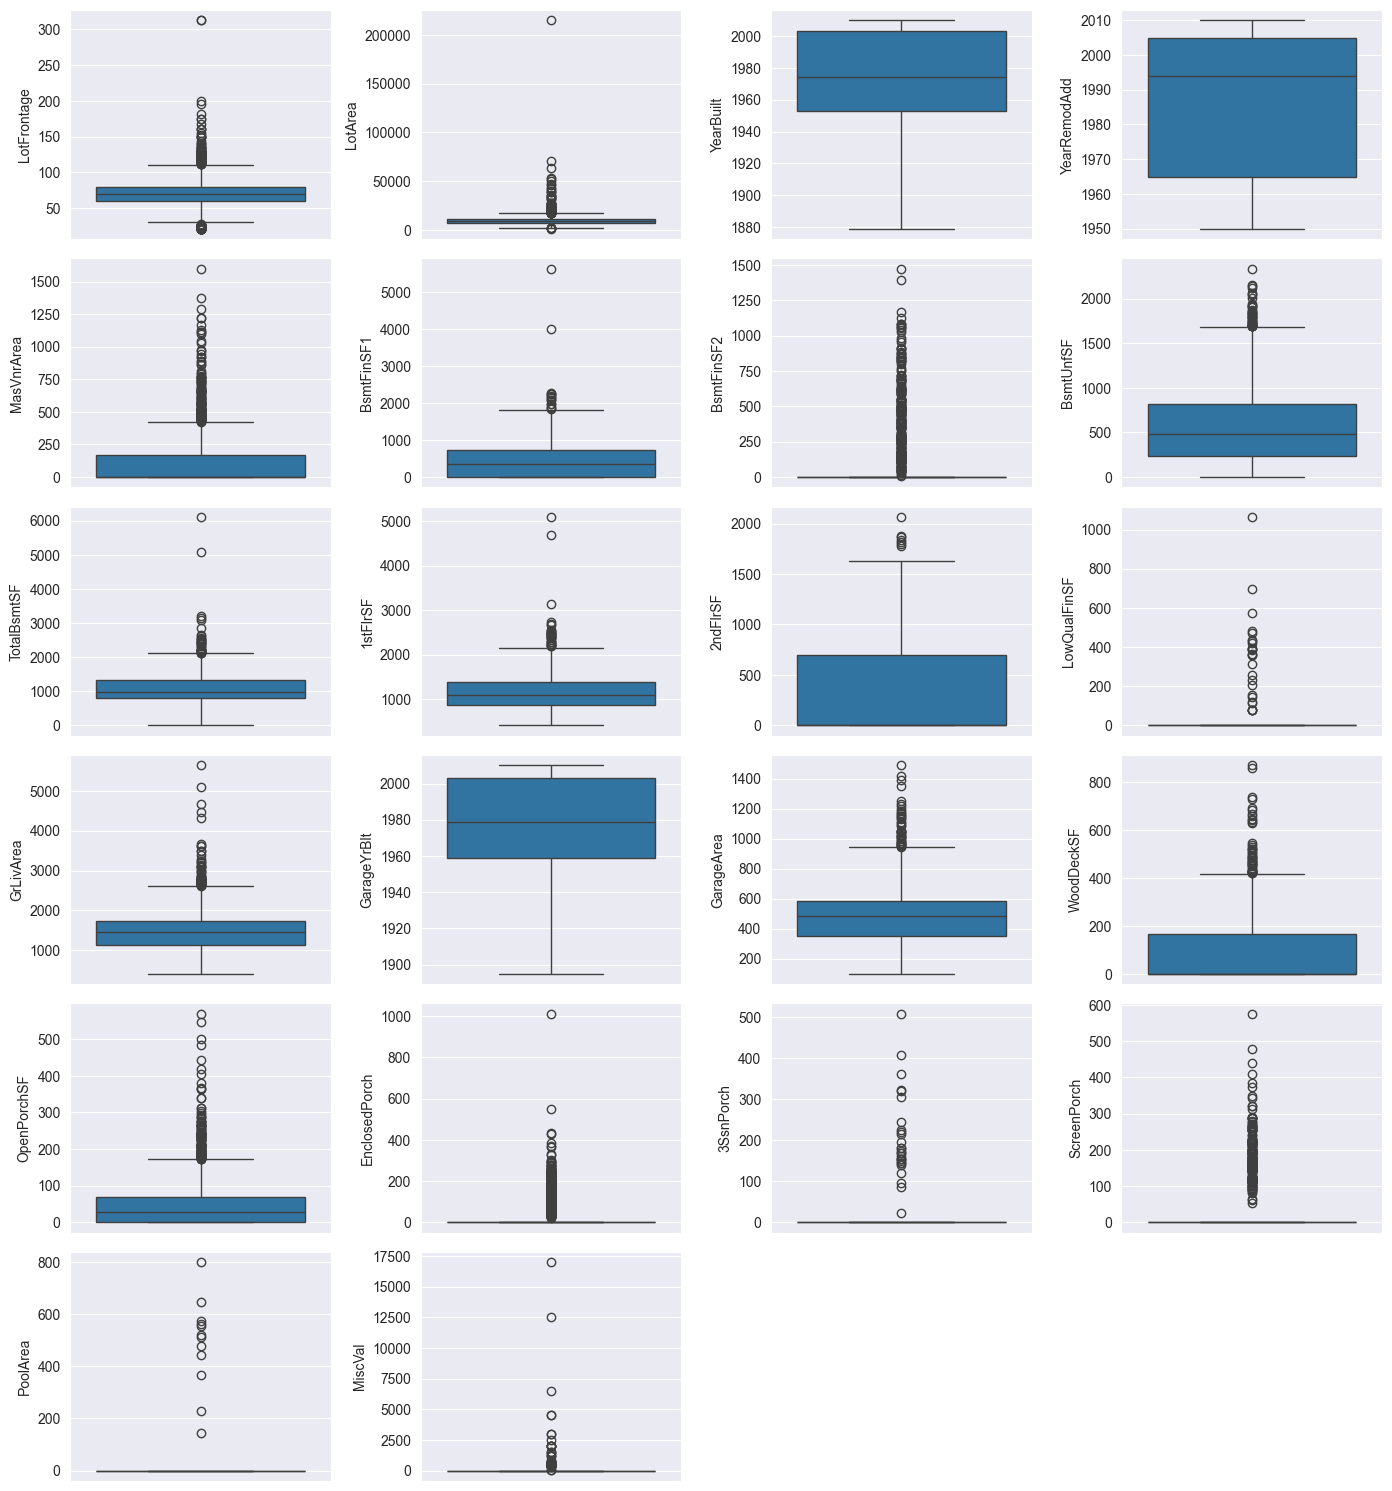

In [9]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_features.dropna())
fig.tight_layout(pad=1.0)

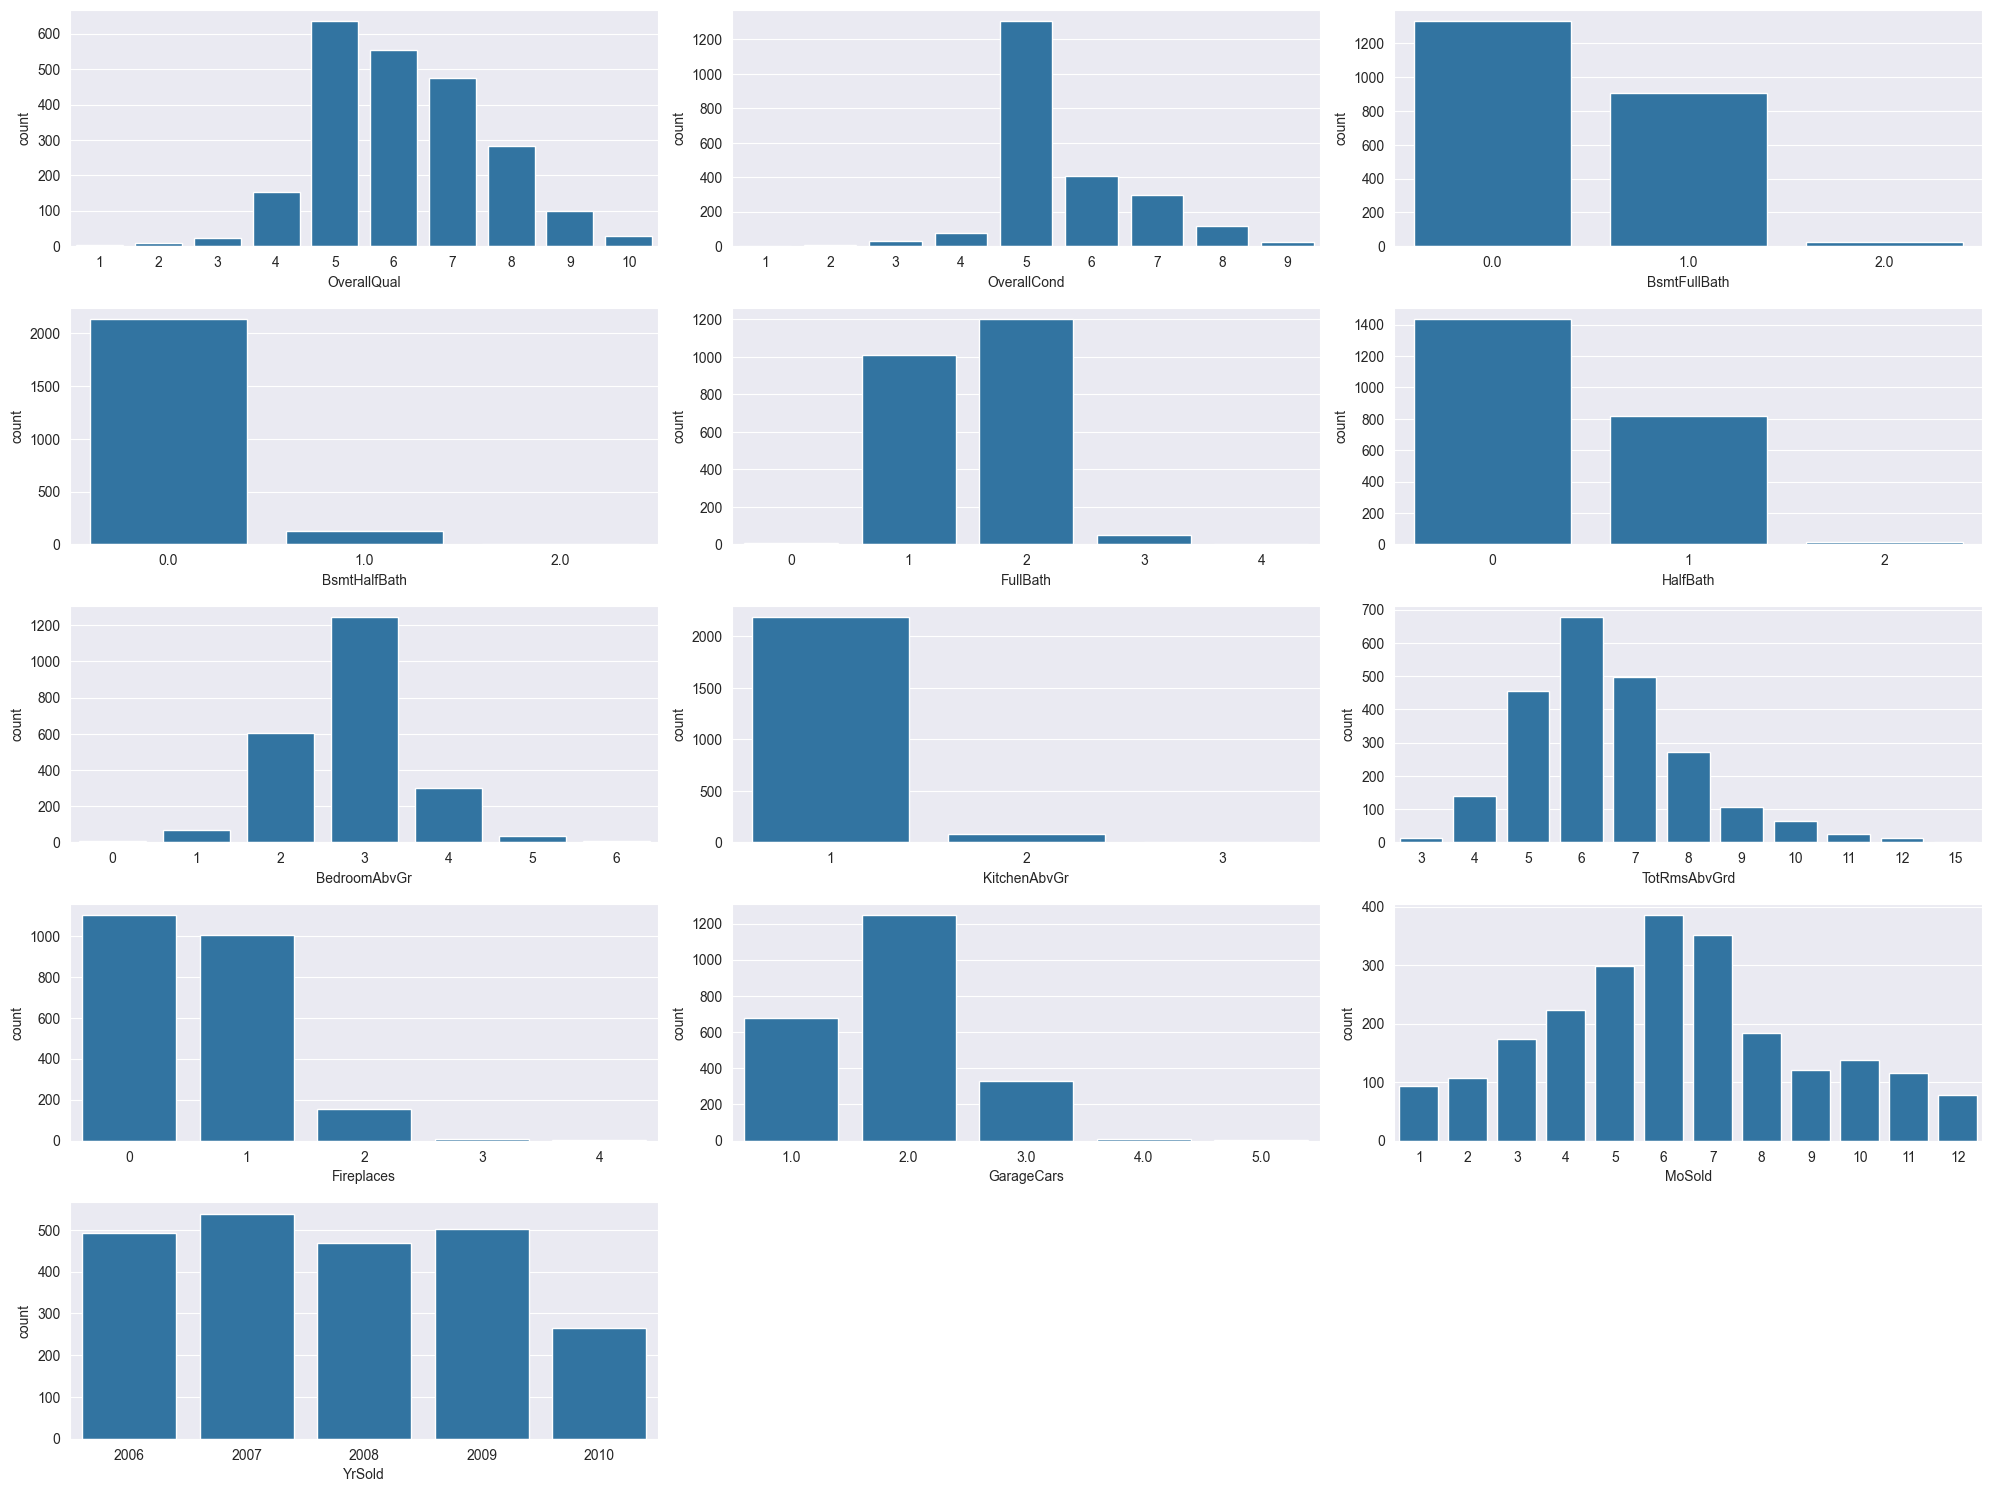

In [10]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_features.dropna())
fig.tight_layout(pad=1.0)

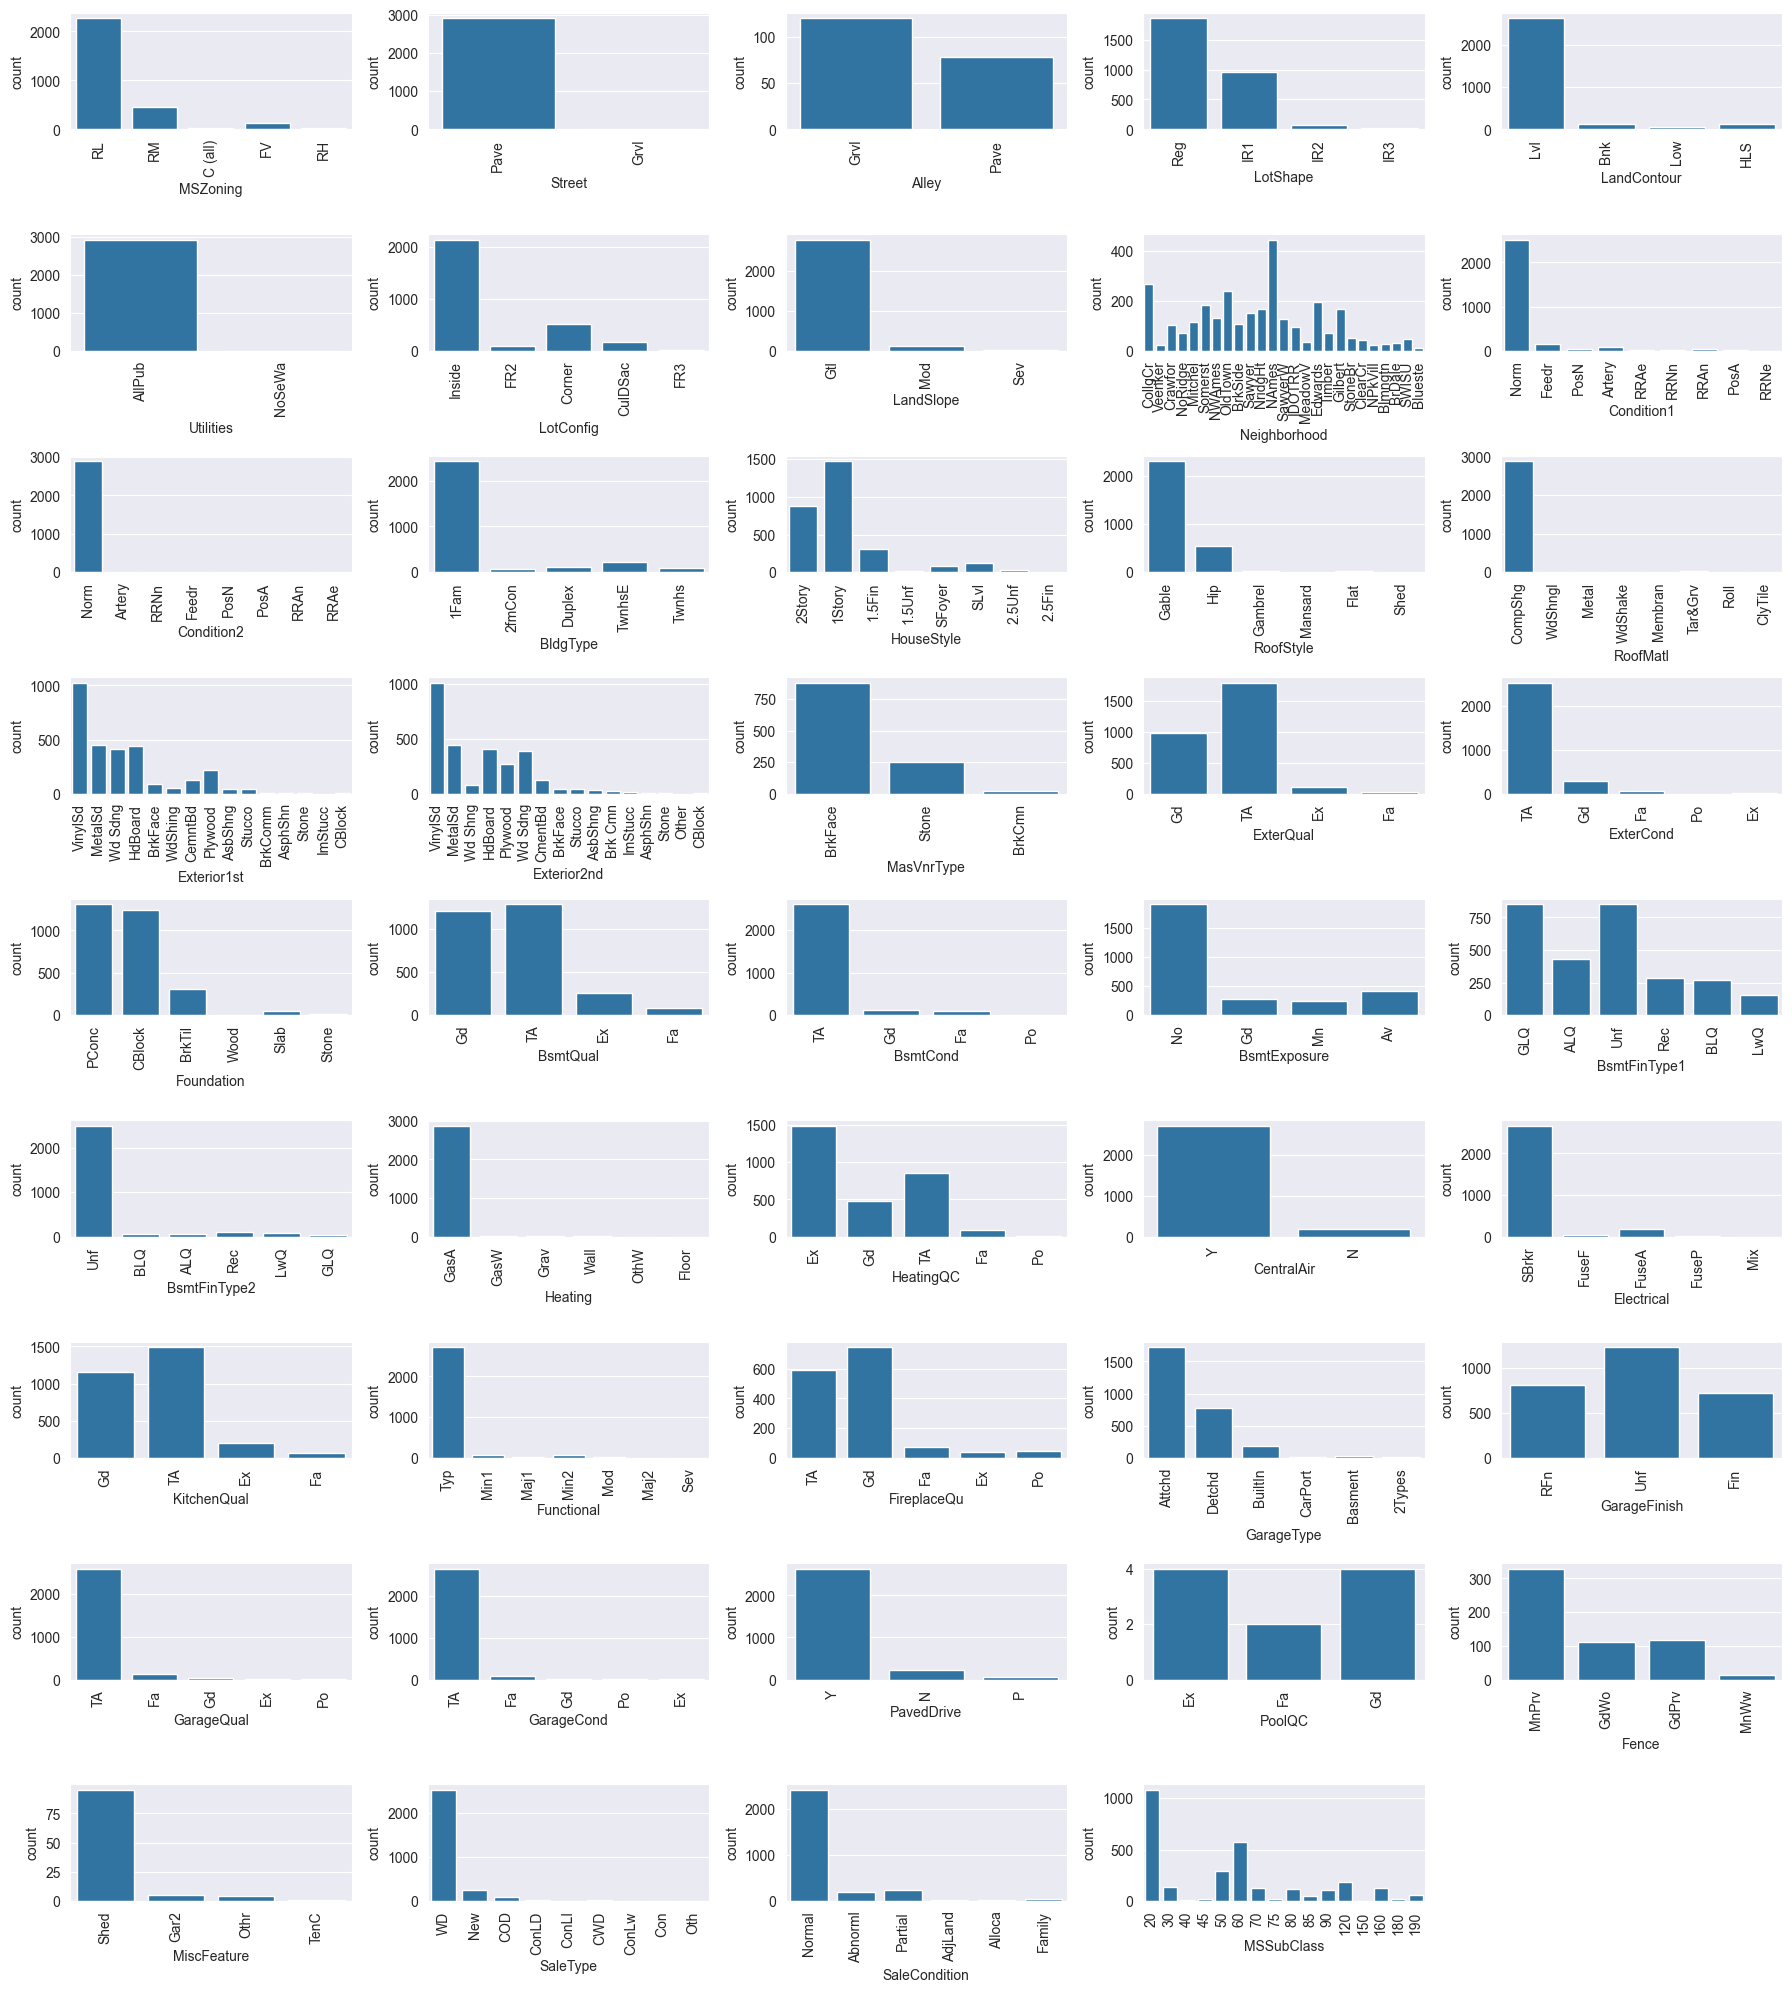

In [11]:
fig = plt.figure(figsize=(18,20))
for index, col_name in enumerate(cat_train.columns):
    plt.subplot(9,5,index+1)
    temp_data = cat_train[[col_name]].dropna()
    sns.countplot(x=col_name, data=temp_data)
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

<Axes: >

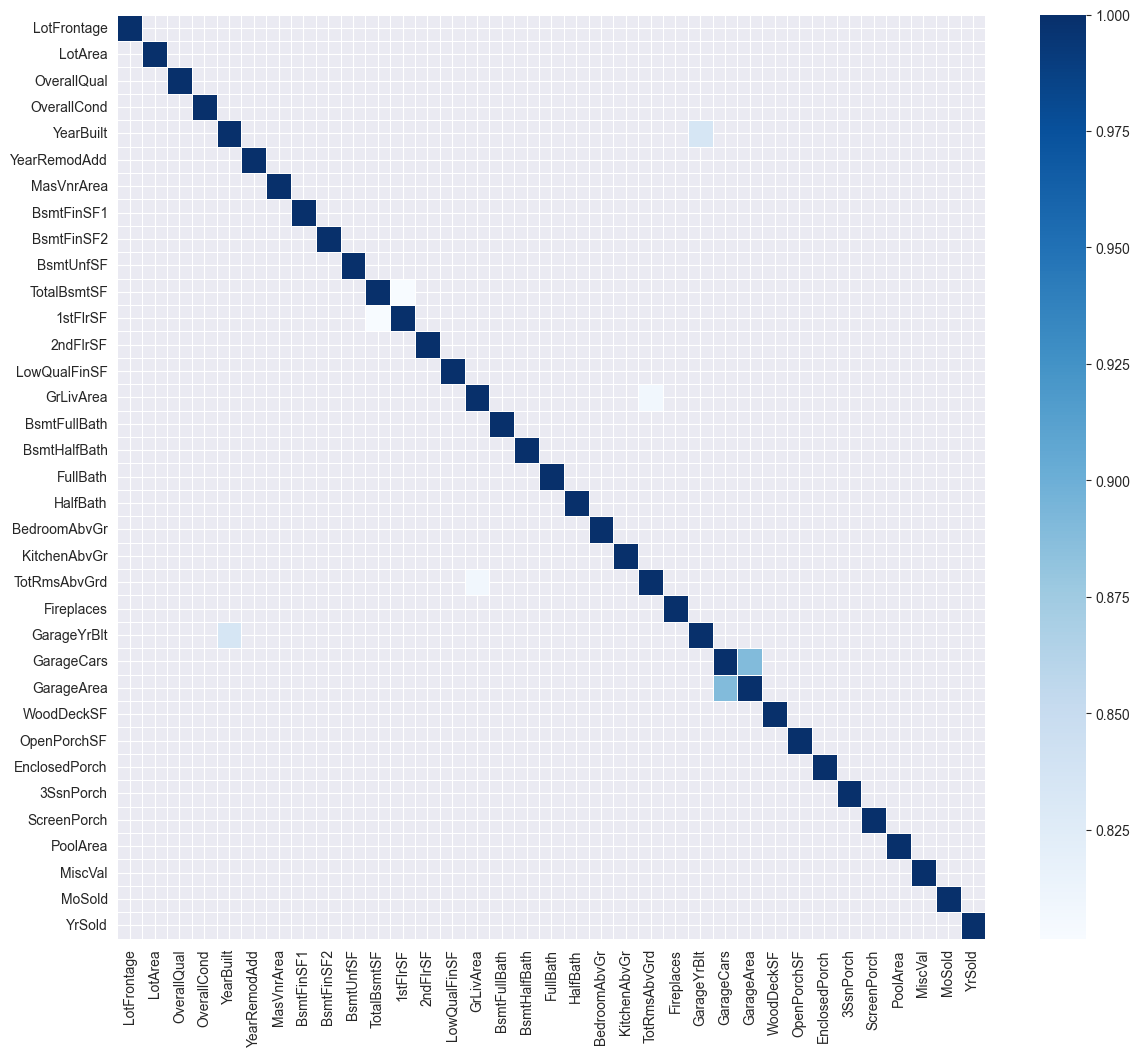

In [12]:

plt.figure(figsize=(14,12))
correlation = numeric_features.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

In [13]:
numeric_train  = train_data.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation.SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

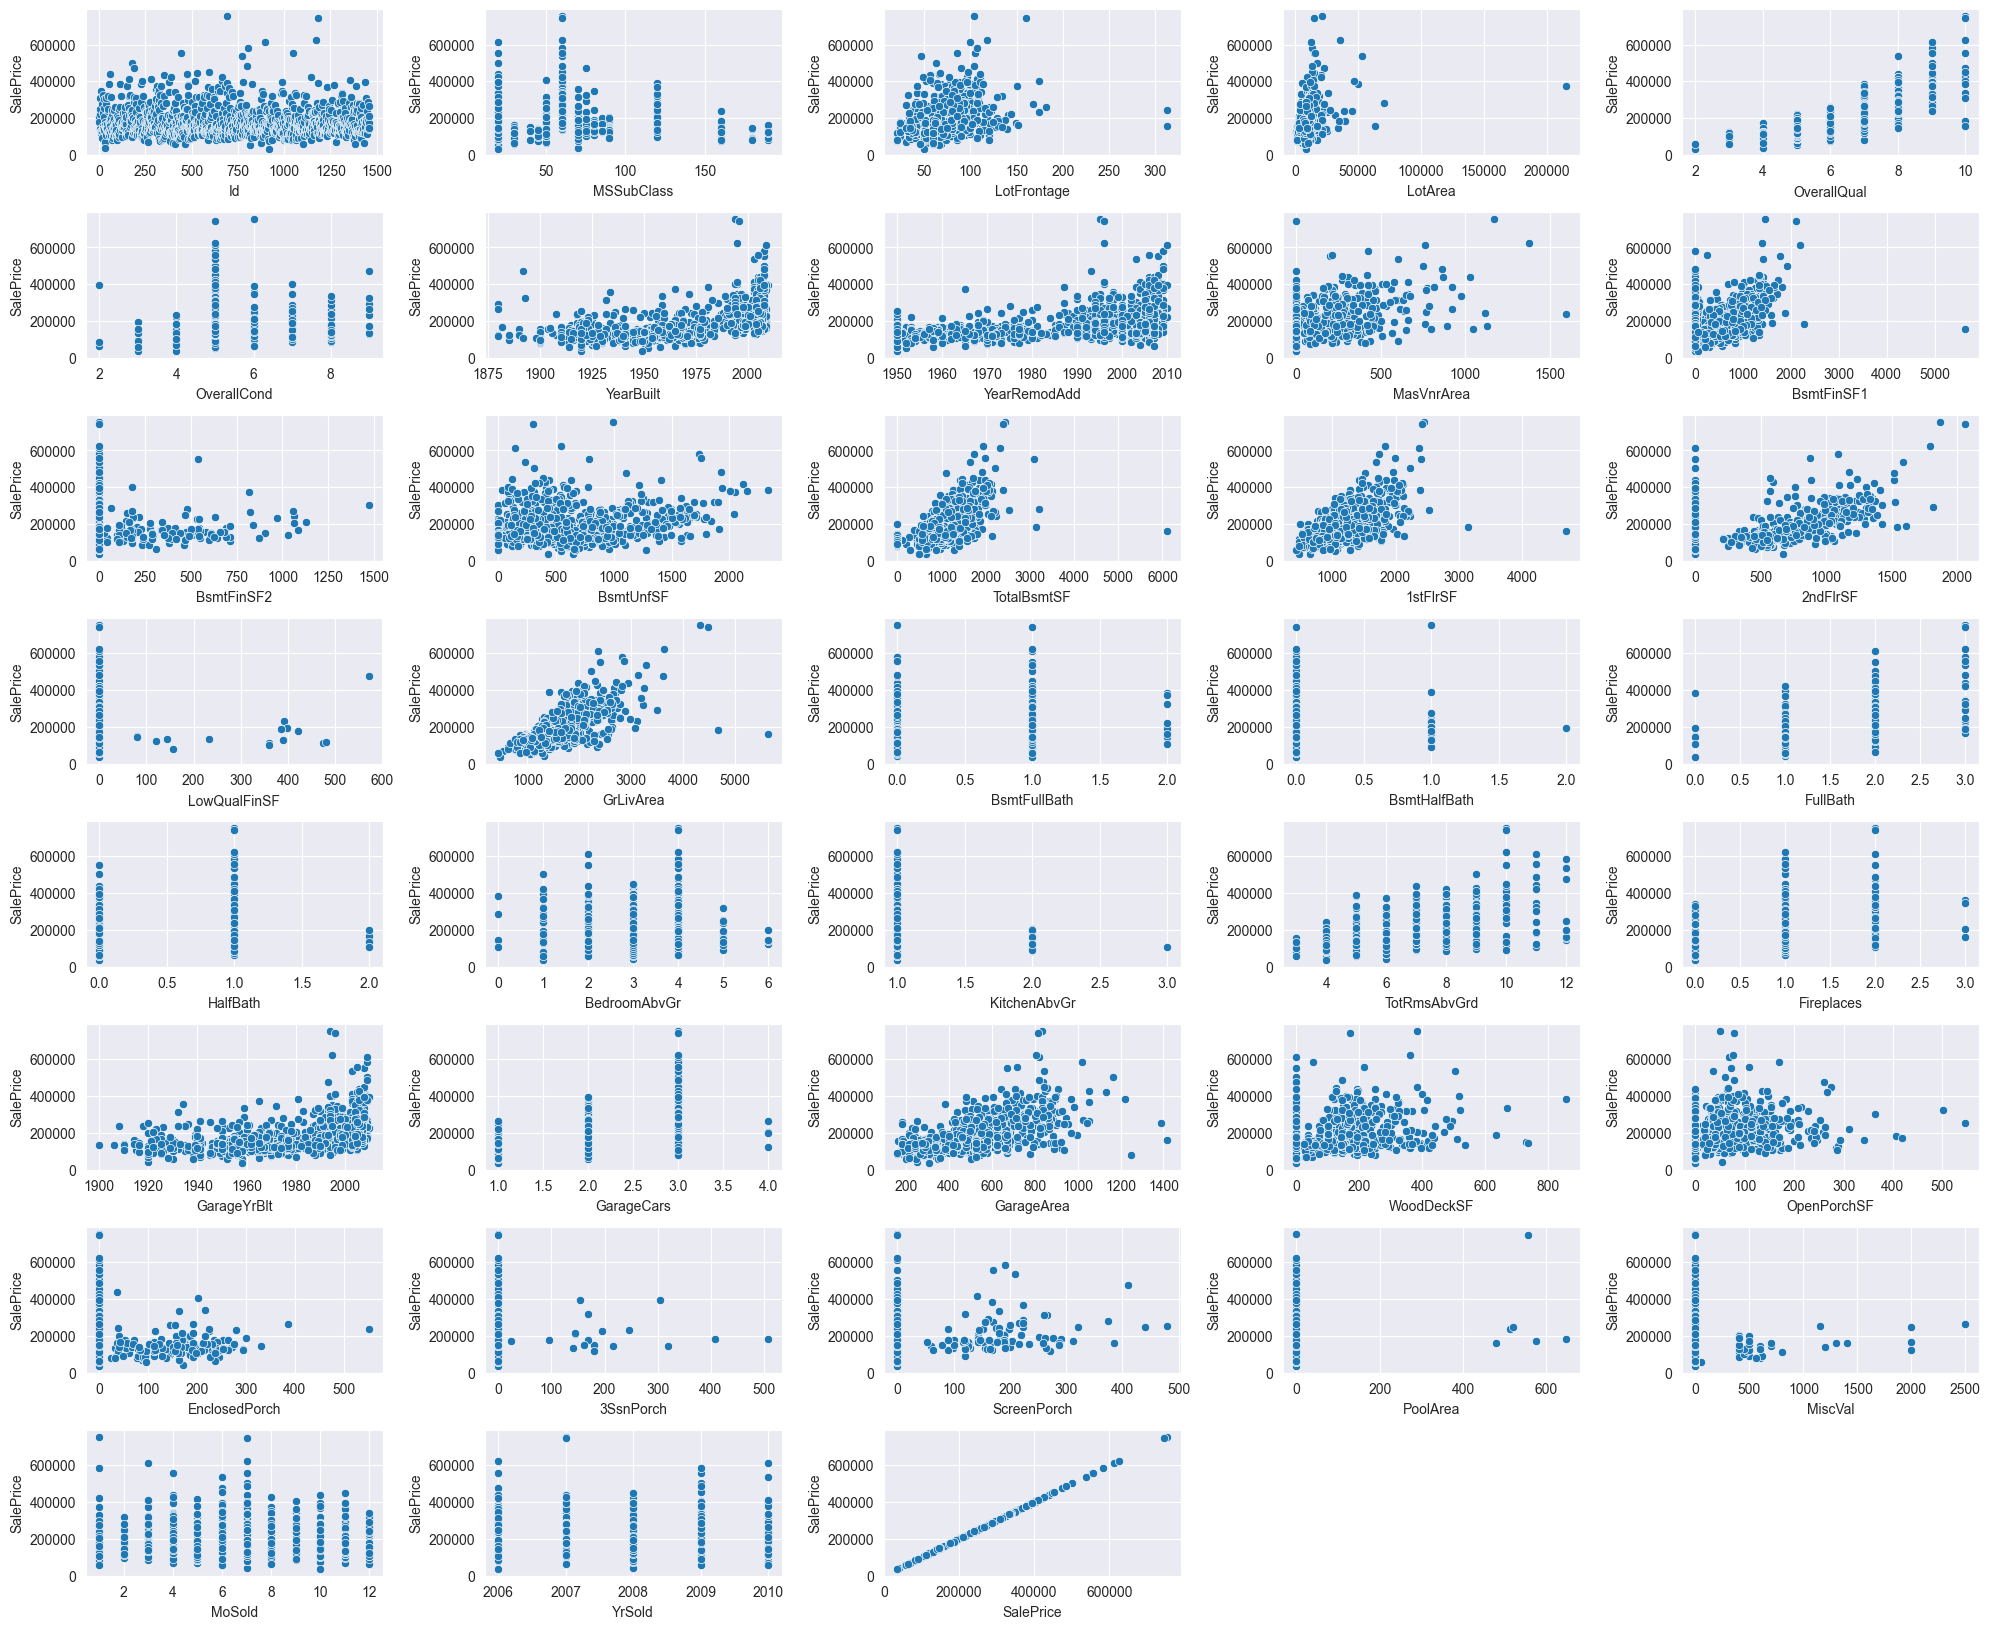

In [14]:
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_train.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=numeric_train.iloc[:,index], y='SalePrice', data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

In [15]:
X.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

<Axes: title={'center': 'Number of missing rows'}, xlabel='features', ylabel='sum'>

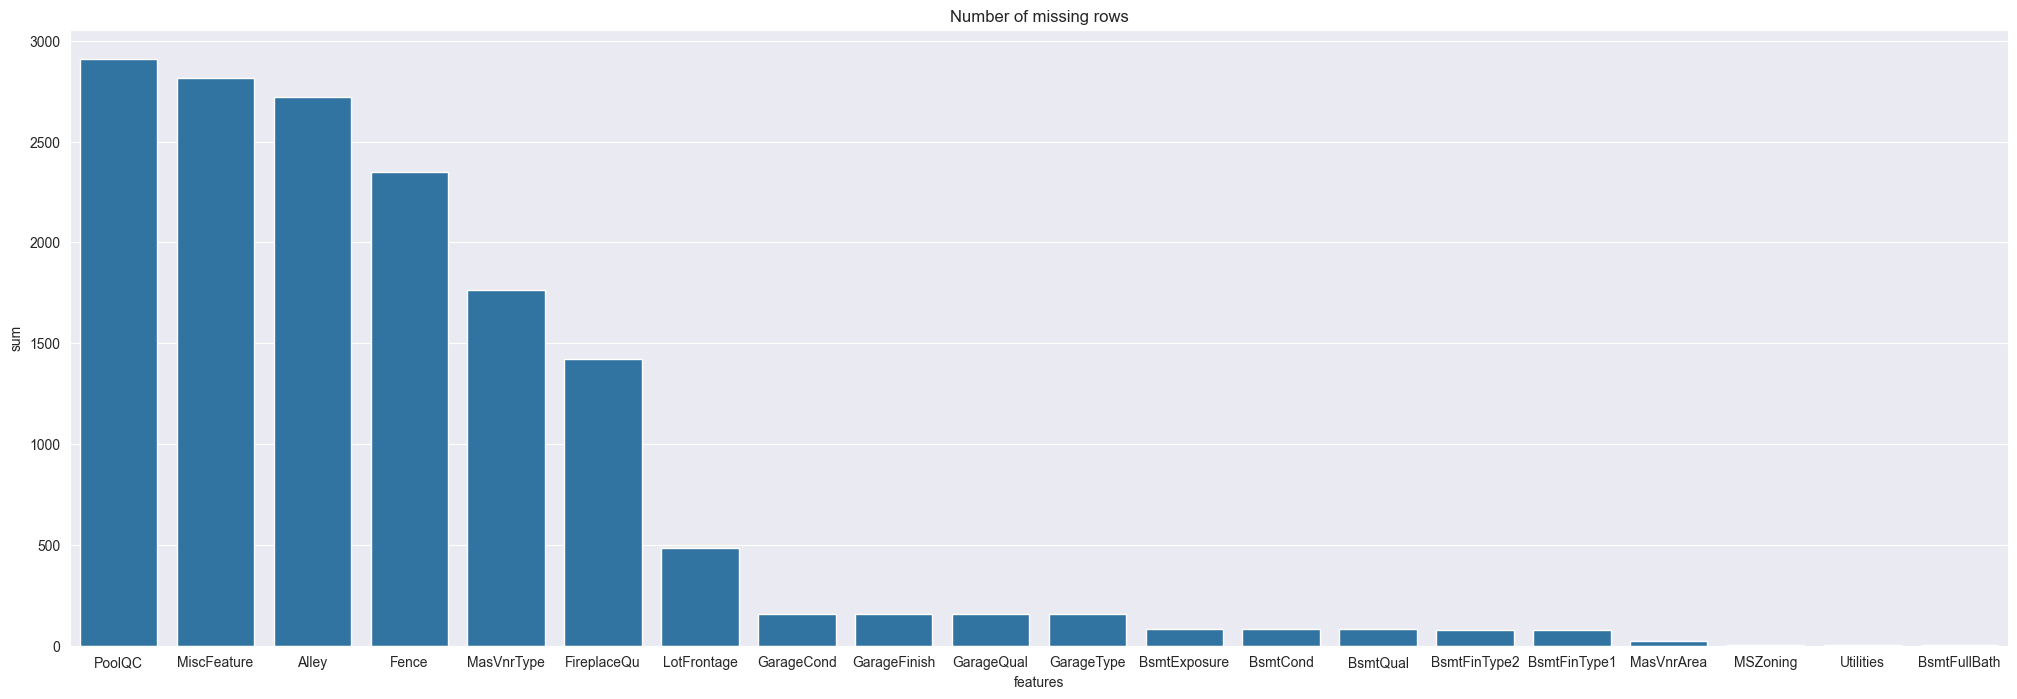

In [16]:

plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

In [17]:
X.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

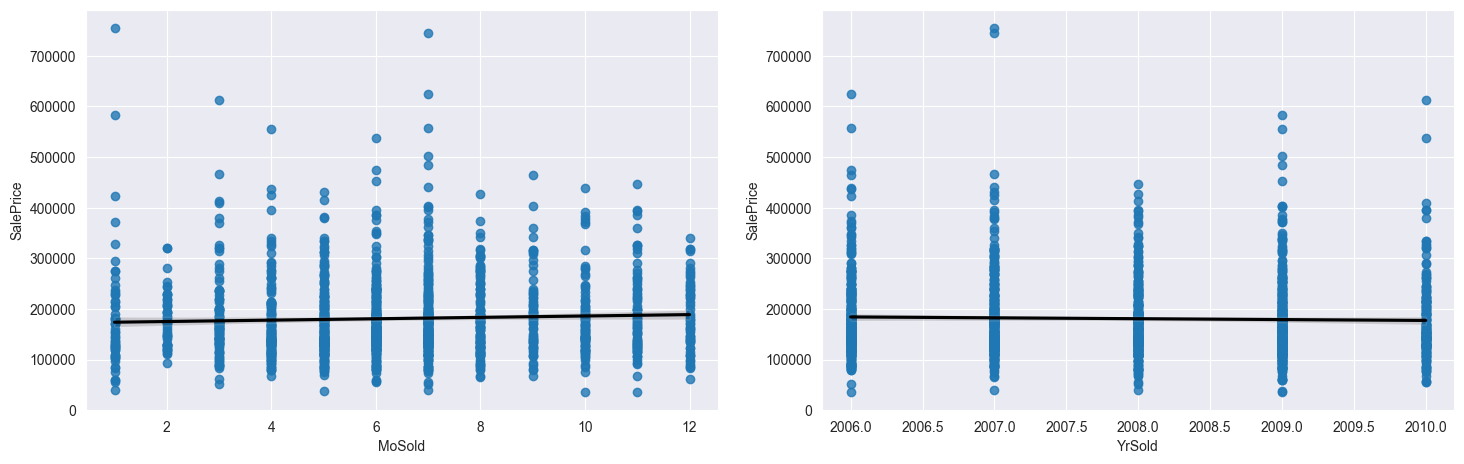

In [18]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
sns.regplot(x=numeric_train['MoSold'], y='SalePrice', data=numeric_train, ax = axes[0], line_kws={'color':'black'})
sns.regplot(x=numeric_train['YrSold'], y='SalePrice', data=numeric_train, ax = axes[1],line_kws={'color':'black'})
fig.tight_layout(pad=2.0)


In [19]:
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False).tail(10)
X.drop(columns=['MoSold','YrSold'], axis=1, inplace=True)

In [20]:
cat_col = X.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
print(overfit_cat)
X = X.drop(overfit_cat, axis=1)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   LotConfig      2919 non-null   object 
 7   LandSlope      2919 non-null   object 
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  BldgType       2919 non-null   object 
 11  HouseStyle     2919 non-null   object 
 12  OverallQual    2919 non-null   int64  
 13  OverallCond    2919 non-null   int64  
 14  YearBuilt      2919 non-null   int64  
 15  YearRemodAdd   2919 non-null   int64  
 16  RoofStyle      2919 non-null   object 
 17  Exterior1st    2918 non-null   object 
 18  Exterior

In [22]:
num_col = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_num = []
for i in num_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_num.append(i)
overfit_num = list(overfit_num)
print(overfit_num)
X = X.drop(overfit_num, axis=1)
X.shape


['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


(2919, 61)

In [23]:
train_data = train_data.drop(train_data[train_data['LotFrontage'] > 200].index)
train_data = train_data.drop(train_data[train_data['LotArea'] > 100000].index)
train_data = train_data.drop(train_data[train_data['BsmtFinSF1'] > 4000].index)
train_data = train_data.drop(train_data[train_data['TotalBsmtSF'] > 5000].index)
train_data = train_data.drop(train_data[train_data['GrLivArea'] > 4000].index)

In [24]:
X.shape


(2919, 61)

In [25]:
pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'], ascending=False).head(20)   

,sum
Fence,2348
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageQual,159
GarageFinish,159
GarageType,157
BsmtExposure,82
BsmtCond,82


In [26]:
cat = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']
X[cat]  = X[cat].fillna('NA')

Text(0.5, 1.0, '房价在不同邻居的分布')

d:\soft\anaconda3\envs\Kaggle-Titanic-20250623\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\soft\anaconda3\envs\Kaggle-Titanic-20250623\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\soft\anaconda3\envs\Kaggle-Titanic-20250623\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\soft\anaconda3\envs\Kaggle-Titanic-20250623\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\soft\anaconda3\envs\Kaggle-Titanic-20250623\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) Arial.
  func(*args, 

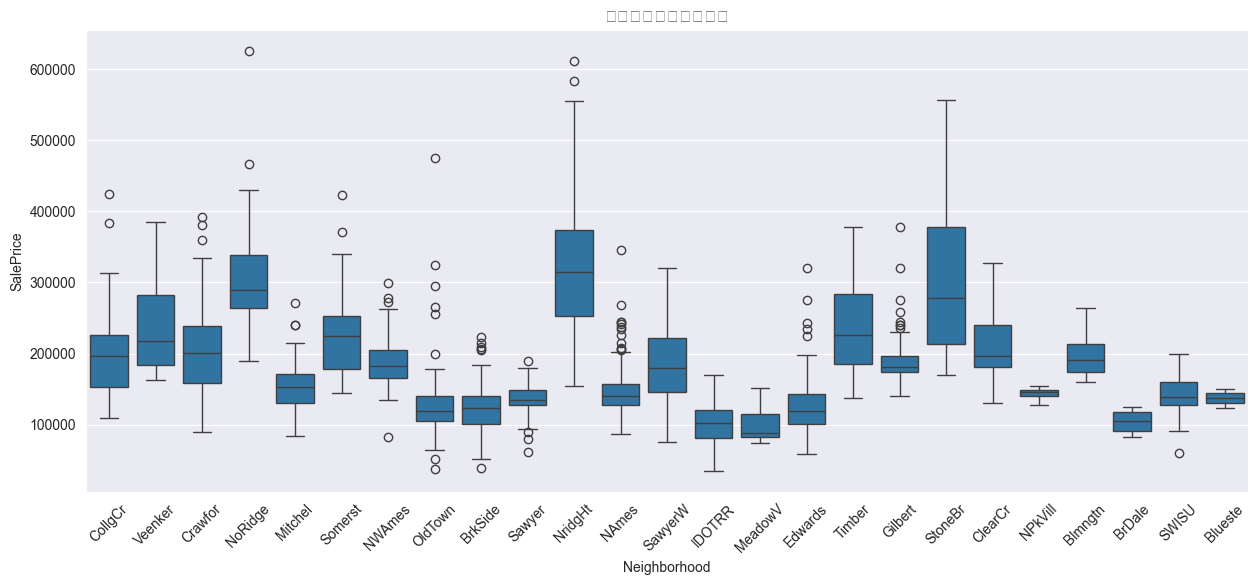

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.xticks(rotation=45)
plt.title('房价在不同邻居的分布')

In [28]:
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
# 调试版本：详细显示每一步
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]

def debug_fill_na(group):
    """调试版本的填充函数"""
    print(f"处理组: {group.name}")
    print(f"组大小: {len(group)}")
    
    for col in cols:
        print(f"  列 {col}:")
        print(f"    原始值: {group[col].tolist()}")
        print(f"    缺失值数量: {group[col].isnull().sum()}")
        
        if group[col].isnull().any():
            mode_values = group[col].mode()
            print(f"    众数: {mode_values.tolist()}")
            
            if len(mode_values) > 0:
                fill_value = mode_values.iloc[0]
                print(f"    填充值: {fill_value}")
                group[col] = group[col].fillna(fill_value)
            else:
                print(f"    警告: 没有众数，无法填充")
        
        print(f"    填充后: {group[col].tolist()}")
        print()
    
    return group

# 使用调试版本
X_debug = X.copy()
result = X_debug.groupby('Neighborhood').apply(debug_fill_na)
X[cols] = X.groupby('Neighborhood')[cols].transform(lambda x: x.fillna(x.mode().iloc[0] if len(x.mode()) > 0 else None))

处理组: Blmngtn
组大小: 28
  列 MasVnrType:
    原始值: ['BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', nan, 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace']
    缺失值数量: 1
    众数: ['BrkFace']
    填充值: BrkFace
    填充后: ['BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace', 'BrkFace']

  列 MSZoning:
    原始值: ['RL', 'RL', 'RL', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'RM', 'RL']
    缺失值数量: 0
    填充后: ['RL', 'RL', 'RL', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', '

C:\Users\qing.tang\AppData\Local\Temp\ipykernel_15144\1179841504.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = X_debug.groupby('Neighborhood').apply(debug_fill_na)
C:\Users\qing.tang\AppData\Local\Temp\ipykernel_15144\1179841504.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[cols] = X.groupby('Neighborhood')[cols].transform(lambda x: x.fillna(x.mode().iloc[0] if len(x.mode()) > 0 else None))


In [29]:
X['LotFrontage'] = X.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
X['GarageArea'] = X.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [30]:
cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
X[cont] = X[cont].fillna(X[cont].mean())


In [31]:
X['MSSubClass'] = X['MSSubClass'].apply(str)


In [32]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    X[col] = X[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    X[col] = X[col].map(fintype_map)

X['BsmtExposure'] = X['BsmtExposure'].map(expose_map)
X['Fence'] = X['Fence'].map(fence_map)

In [33]:

X['TotalLot'] = X['LotFrontage'] + X['LotArea']
X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
X['TotalBath'] = X['FullBath'] + X['HalfBath']
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']

In [34]:
colum = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch']
for col in colum:
    col_name = col + '_bin'
    X[col_name] = X[col].apply(lambda x: 1 if x > 0 else 0)



X.shape 


(2919, 72)

In [35]:
X = pd.get_dummies(X)
X.shape

(2919, 222)

C:\Users\qing.tang\AppData\Local\Temp\ipykernel_15144\3918128981.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(train_data['SalePrice'],norm_hist=False)


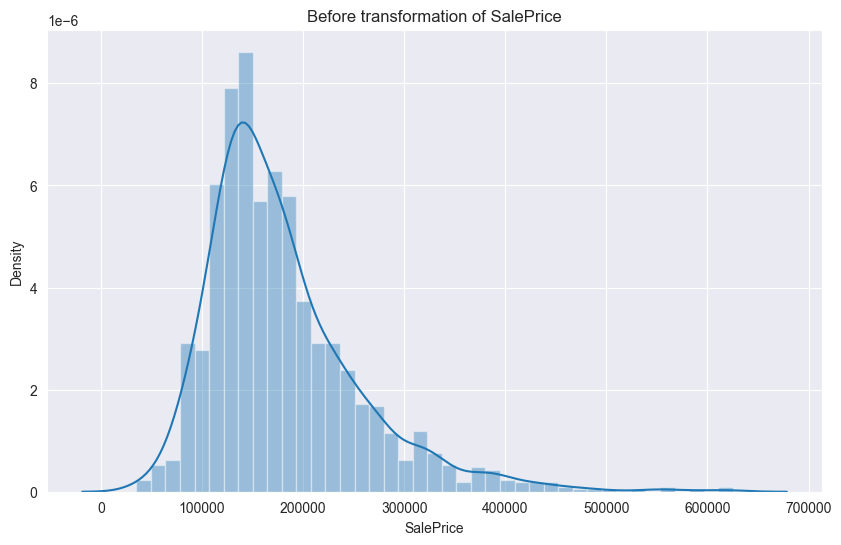

In [36]:
plt.figure(figsize=(10,6))
plt.title("Before transformation of SalePrice")
dist = sns.distplot(train_data['SalePrice'],norm_hist=False)

C:\Users\qing.tang\AppData\Local\Temp\ipykernel_15144\3369157416.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(np.log(train_data['SalePrice']),norm_hist=False)


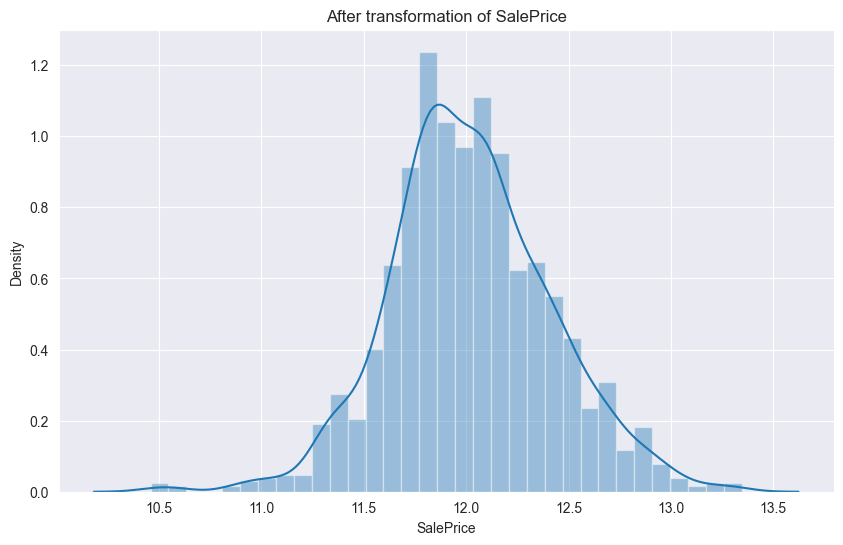

In [37]:
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
dist = sns.distplot(np.log(train_data['SalePrice']),norm_hist=False)

In [38]:
y["SalePrice"] = np.log(y['SalePrice'])


In [39]:
print(f"y 的类型: {type(y)}")
print(f"y 的形状: {y.shape}")
print(f"y 的前几个值: {y.head()}")

y 的类型: <class 'pandas.core.frame.DataFrame'>
y 的形状: (1460, 1)
y 的前几个值:    SalePrice
0  12.247694
1  12.109011
2  12.317167
3  11.849398
4  12.429216


In [40]:
train_size = len(train_data)
x = X.iloc[:train_size]  # 选择前1459行
test = X.iloc[train_size:] 
y = y.iloc[:train_size]



In [41]:
# print(test_data.index)
print(train_data.index)
print(x)


Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
      dtype='int64', length=1451)
      LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       65.000000     8450            7            5       2003          2003   
1       80.000000     9600            6            8       1976          1976   
2       68.000000    11250            7            5       2001          2002   
3       60.000000     9550            7            5       1915          1970   
4       84.000000    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1446    75.144444    26142            5            7       1962          1962   
1447    80.000000    10000            8            5       1995          1996   
1448    70.000000    11767            4            7       1910          2000   
1449    21

In [42]:
# 查看原始数据的索引
print("原始训练集索引:")
print(f"train_data.index: {list(train_data.index[:5])}")
print(f"训练集索引范围: {train_data.index.min()} - {train_data.index.max()}")
print(f"训练集样本数: {len(train_data)}")

print("\n原始测试集索引:")
print(f"test_data.index: {list(test_data.index[:5])}")
print(f"测试集索引范围: {test_data.index.min()} - {test_data.index.max()}")
print(f"测试集样本数: {len(test_data)}")

原始训练集索引:
train_data.index: [0, 1, 2, 3, 4]
训练集索引范围: 0 - 1459
训练集样本数: 1451

原始测试集索引:
test_data.index: [0, 1, 2, 3, 4]
测试集索引范围: 0 - 1458
测试集样本数: 1459


In [43]:

print("pandas默认索引:")
print(f"训练集默认索引: 0 到 {len(train_data)-1}")
print(f"测试集默认索引: 0 到 {len(test_data)-1}")

pandas默认索引:
训练集默认索引: 0 到 1450
测试集默认索引: 0 到 1458


In [44]:
print("合并后的索引情况:")
print(f"X的索引: {list(X.index[:10])} ... {list(X.index[-10:])}")
print(f"X索引范围: {X.index.min()} - {X.index.max()}")
print(f"X总行数: {len(X)}")

合并后的索引情况:
X的索引: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ... [2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918]
X索引范围: 0 - 2918
X总行数: 2919


In [45]:

print("索引重复检查:")
duplicate_indices = X.index.duplicated()
print(f"重复索引数量: {duplicate_indices.sum()}")
print(f"重复的索引: {X.index[duplicate_indices].tolist()[:10]}")

索引重复检查:
重复索引数量: 0
重复的索引: []


In [46]:
# 检查x和test的索引是否有重叠
x_indices = set(x.index)
test_indices = set(test.index)
overlap = x_indices.intersection(test_indices)

print("索引重叠检查:")
print(f"x 索引数量: {len(x_indices)}")
print(f"test 索引数量: {len(test_indices)}")
print(f"重叠索引数量: {len(overlap)}")
print(f"重叠索引: {overlap}")

if len(overlap) == 0:
    print("✓ 没有重复数据")
else:
    print("✗ 存在重复数据")

索引重叠检查:
x 索引数量: 1451
test 索引数量: 1468
重叠索引数量: 0
重叠索引: set()
✓ 没有重复数据


In [47]:
from sklearn.preprocessing import RobustScaler

cols = x.select_dtypes(np.number).columns
transformer = RobustScaler().fit(x[cols])
x[cols] = transformer.transform(x[cols])
test[cols] = transformer.transform(test[cols])

C:\Users\qing.tang\AppData\Local\Temp\ipykernel_15144\3670654852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[cols] = transformer.transform(x[cols])
C:\Users\qing.tang\AppData\Local\Temp\ipykernel_15144\3670654852.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[cols] = transformer.transform(test[cols])


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2020)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

In [50]:
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror')


In [51]:
import xgboost as xgb
import subprocess

def check_gpu_availability():
    """检查GPU是否可用"""
    print("🔍 检查GPU可用性...")
    
    # 检查CUDA是否可用
    try:
        import cupy as cp
        print("✅ CuPy可用")
        gpu_count = cp.cuda.runtime.getDeviceCount()
        print(f"🎮 检测到 {gpu_count} 个GPU设备")
        
        for i in range(gpu_count):
            props = cp.cuda.runtime.getDeviceProperties(i)
            print(f"  GPU {i}: {props['name'].decode()}")
            print(f"    内存: {props['totalGlobalMem'] / 1024**3:.1f} GB")
        
        return True
    except ImportError:
        print("❌ CuPy不可用")
        return False
    except Exception as e:
        print(f"❌ GPU检查失败: {e}")
        return False

def check_xgboost_gpu():
    """检查XGBoost GPU支持"""
    print("\n�� 检查XGBoost GPU支持...")
    
    try:
        # 尝试创建GPU模型
        model = xgb.XGBRegressor(tree_method='gpu_hist')
        print("✅ XGBoost GPU支持可用")
        return True
    except Exception as e:
        print(f"❌ XGBoost GPU支持不可用: {e}")
        return False

# 检查GPU
gpu_available = check_gpu_availability()
xgboost_gpu_available = check_xgboost_gpu()

if gpu_available and xgboost_gpu_available:
    print("\n🎉 GPU加速可用!")
    tree_method = 'gpu_hist'
else:
    print("\n⚠️  GPU不可用，使用CPU")
    tree_method = 'hist'

🔍 检查GPU可用性...
❌ CuPy不可用

�� 检查XGBoost GPU支持...
✅ XGBoost GPU支持可用

⚠️  GPU不可用，使用CPU


In [58]:
from sklearn.model_selection import RandomizedSearchCV
import time
from datetime import datetime
from xgboost import XGBRegressor  # 确保导入XGBRegressor

param_lst = {
    'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100, 500, 1000, 2000, 3000],
    'max_depth' : [3, 6, 9],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.1]
}

# 创建XGBRegressor实例
xgb_model = XGBRegressor(random_state=42)

print("检查模型实例:")
print(f"xgb_model 的类型: {type(xgb_model)}")
print(f"xgb_model 的参数: {xgb_model.get_params()}")

# 添加详细输出和进度监控
xgb_reg = RandomizedSearchCV(
    estimator = xgb_model,  # 使用模型实例，不是模块
    param_distributions = param_lst,
    n_iter = 5, 
    scoring = 'neg_root_mean_squared_error',
    cv = 5,
    verbose = 2,  # 详细输出：显示每次迭代的详细信息
    n_jobs = -1,   # 使用单线程，便于观察进度
    random_state = 42
)

print("=" * 60)
print("开始XGBoost超参数调优")
print("=" * 60)
print(f"开始时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"参数空间:")
for param, values in param_lst.items():
    print(f"  {param}: {values}")
print(f"随机搜索次数: 100")
print(f"交叉验证折数: 5")
print(f"总训练次数: 100 * 5 = 500")
print("=" * 60)

start_time = time.time()
xgb_search = xgb_reg.fit(X_train, y_train)
end_time = time.time()

print("=" * 60)
print("超参数调优完成!")
print(f"结束时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"总耗时: {end_time - start_time:.2f} 秒")
print(f"平均每次迭代: {(end_time - start_time)/100:.2f} 秒")
print("=" * 60)

# 显示详细结果
print("最佳参数组合:")
for param, value in xgb_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n最佳交叉验证分数:")
print(f"  RMSE: {-xgb_search.best_score_:.4f}")

# 显示搜索历史
print(f"\n搜索历史:")
print(f"  总测试组合数: {len(xgb_search.cv_results_['mean_test_score'])}")
print(f"  最佳组合索引: {xgb_search.best_index_}")

# 显示前5个最佳结果
print(f"\n前5个最佳结果:")
results_df = pd.DataFrame(xgb_search.cv_results_)
results_df = results_df.sort_values('mean_test_score', ascending=False)
for i, (_, row) in enumerate(results_df.head().iterrows()):
    print(f"  第{i+1}名: RMSE = {-row['mean_test_score']:.4f}")
    print(f"    参数: {row['params']}")
    print()

# XGB with tune hyperparameters
best_param = xgb_search.best_params_
xgb = XGBRegressor(**best_param)

print("使用最佳参数创建新的XGBoost模型...")
print(f"模型参数: {xgb.get_params()}")

检查模型实例:
xgb_model 的类型: <class 'xgboost.sklearn.XGBRegressor'>
xgb_model 的参数: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
开始XGBoost超参数调优
开始时间: 202

In [59]:
def mean_cross_val(model, X, y):
    score = cross_val_score(model, X, y, cv=5)
    mean = score.mean()
    return mean

xgb.fit(X_train, y_train)   
preds = xgb.predict(X_val) 
preds_test_xgb = xgb.predict(test)
mae_xgb = mean_absolute_error(y_val, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_val, preds))
score_xgb = xgb.score(X_val, y_val)
cv_xgb = mean_cross_val(xgb, x, y)

In [60]:
def blend_models_predict(X, b, c, d):
        return (b* xgb.predict(X)) 
subm = np.exp(blend_models_predict(test, 1, 0.3, 0.3))
submission = pd.DataFrame({'Id': test.index,
                           'SalePrice': subm})

submission.to_csv("submission.csv", index=False)